### Bloch Sphere:
![bloch sphere image](./images/bloch_sphere.png)

# FTL_QUANTUM
## Quantum Logic Gates
### X, Z, H (Hadamard), T
```
   ┌───┐      ┌───┐      ┌───┐      ┌───┐ 
q: ┤ X ├   q: ┤ Z ├   q: ┤ H ├   q: ┤ T ├ 
   └───┘      └───┘      └───┘      └───┘ 
```

$q = \begin{bmatrix} \alpha \\ \beta \end{bmatrix} \rarr \text{X Gate} \rarr \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}\begin{bmatrix} \alpha \\ \beta \end{bmatrix} = \begin{bmatrix} \beta \\ \alpha \end{bmatrix}$

$q = \begin{bmatrix} \alpha \\ \beta \end{bmatrix} \rarr \text{Z Gate} \rarr \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix}\begin{bmatrix} \alpha \\ \beta \end{bmatrix} = \begin{bmatrix} \alpha \\ -\beta \end{bmatrix}$

$q = \begin{bmatrix} \alpha \\ \beta \end{bmatrix} \rarr \text{H Gate} \rarr \frac{1}{\sqrt{2}} \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}\begin{bmatrix} \alpha \\ \beta \end{bmatrix} = \frac{1}{\sqrt{2}}\begin{bmatrix} \alpha + \beta \\ \alpha - \beta \end{bmatrix}$

$q = \begin{bmatrix} 0 \\ 1 \end{bmatrix} = |1\rangle \rarr \text{H Gate} \rarr \frac{1}{\sqrt{2}} \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}\begin{bmatrix} 0 \\ 1 \end{bmatrix} = \frac{1}{\sqrt{2}}\begin{bmatrix} +1 \\ -1 \end{bmatrix} = |-\rangle$

$q = \begin{bmatrix} 1 \\ 0 \end{bmatrix} = |0\rangle \rarr \text{H Gate} \rarr \frac{1}{\sqrt{2}} \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}\begin{bmatrix} 1 \\ 0 \end{bmatrix} = \frac{1}{\sqrt{2}}\begin{bmatrix} +1 \\ +1 \end{bmatrix} = |+\rangle$

$q = \begin{bmatrix} \alpha \\ \beta \end{bmatrix} \rarr \text{H Gate} \rarr \begin{bmatrix} 1 & 0 \\ 0 & e^{{i\pi}/4} \end{bmatrix}\begin{bmatrix} \alpha \\ \beta \end{bmatrix} = \frac{1}{\sqrt{2}}\begin{bmatrix} \alpha \\ e^{{i\pi}/4} \beta \end{bmatrix}$


### CNOT (XOR) / CX
```
q_0: ──■──      ──■── 
     ┌─┴─┐  ==    |   
q_1: ┤ X ├        |   
     └───┘      ──⊕── 
```

$
CNOT(q_0, q_1) = \begin{bmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0 \end{bmatrix} \begin{bmatrix} a \\ b \\ c \\ d \end{bmatrix}
= \begin{bmatrix} a \\ b \\ d \\ c \end{bmatrix}
= a|00\rangle+b|01\rangle+d|10\rangle+c|11\rangle
$

### SWAP

```
     ──X── 
Swap   |   
       |   
     ──X── 
```
$
Swap(q_0, q_1) = \begin{bmatrix} 1 & 0 & 0 & 0 \\ 0 & 0 & 1 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \end{bmatrix} \begin{bmatrix} a \\ b \\ c \\ d \end{bmatrix}
= \begin{bmatrix} a \\ c \\ b \\ d \end{bmatrix}
= a|00\rangle+c|01\rangle+b|10\rangle+d|11\rangle
$

## Exercise 2: Superposition

Write a program (using Python and Qiskit) that will produce a quantum circuit with a single qubit to obtain this $\frac{1}{\sqrt{2}}(|0\rangle+|1\rangle)$ state using the principle of quantum superposition.

The expression $\frac{1}{\sqrt{2}}(|0\rangle+|1\rangle)$ is actually $|+\rangle$ (superposition), so only a Hadamard gate on single qubit quantum circuit would do.

### Solution
0. Let $|\psi_0\rangle = |0\rangle$
1. Apply Hadamard gate on the qubit: $|\psi_1\rangle = |+\rangle = \frac{1}{\sqrt{2}}|0\rangle + \frac{1}{\sqrt{2}}|1\rangle$

Here $|\psi_1\rangle = \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)$

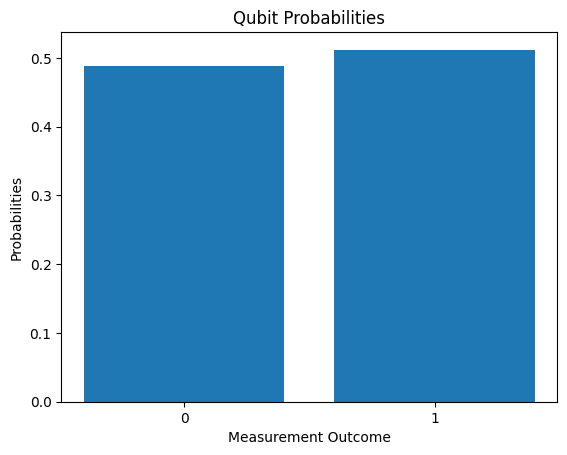

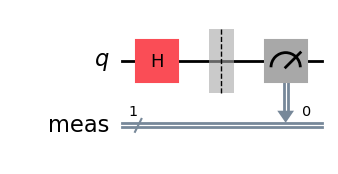

In [1]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from sources.QuantumPlot import qplot

# Create Circuit
qc = QuantumCircuit(1)  # Single qubit quantum circuit
qc.h(0)  # Hadamard gate on qubit 0
qc.measure_all()  # Measeure all qubits.

# Simulate Circuit
backend = Aer.get_backend('qasm_simulator')  # Get the Aer simulator
qc = transpile(qc, backend)  # Optimize and transpile
result = backend.run(qc, shots = 500).result()  # 500 shots
counts = result.get_counts(qc)

# Plot Results
qplot(counts)
qc.draw(output='mpl')

## Exercise 3: Entanglement
Write a program that will produce a quantum circuit with two qubits in order to obtain this $\frac{1}{\sqrt{2}}(|00\rangle+|11\rangle)$ state using the principle of superposition and quantum entanglement.

The program must display the circuit, then run it on a quantum simulator with 500 shots and then display the results in a plot_histogram.

Be sure you understand the principle of quantum entanglement and the $\frac{1}{\sqrt{2}}(|00\rangle+|11\rangle)$ notation before continuing.

#### Solution

0. Let $|\psi_0\rangle = |00\rangle$
1. Apply Hadamard Gate on first bit: $|\psi_1\rangle = |+0\rangle = \frac{1}{\sqrt{2}}|00\rangle + \frac{1}{\sqrt{2}}|10\rangle$
2. Apply CNOT Gate on second bit as first bit is for control: $|\psi_2\rangle = \frac{1}{\sqrt{2}}|00\rangle + \frac{1}{\sqrt{2}}|11\rangle$

Here $|\psi_2\rangle = \frac{1}{\sqrt{2}}(|00\rangle + |11\rangle)$


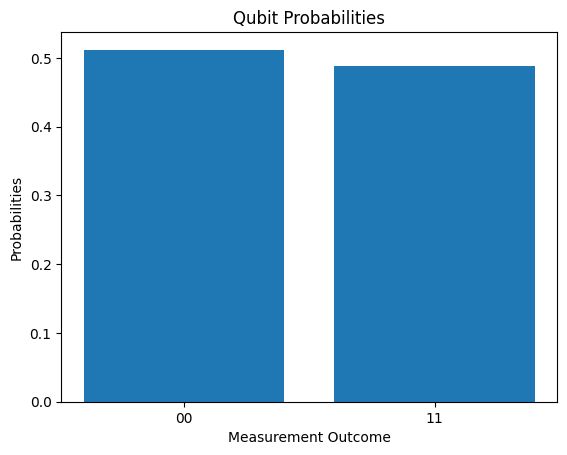

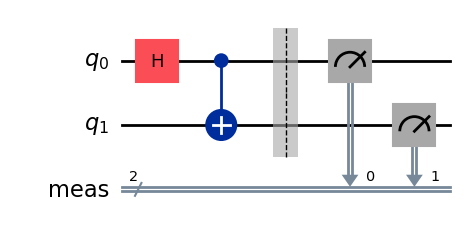

In [2]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from sources.QuantumPlot import qplot

# Create Circuit
qc = QuantumCircuit(2)  # Single qubit quantum circuit
qc.h(0)  # Hadamard gate on qubit 0
qc.cx(0, 1) # CNOT gate from qubit 0 to qubit 1
qc.measure_all()  # Measeure all qubits.

# Simulate Circuit
backend = Aer.get_backend('qasm_simulator')  # Get the Aer simulator
qc = transpile(qc, backend)  # Optimize and transpile
result = backend.run(qc, shots = 500).result()  # 500 shots
counts = result.get_counts(qc)

# Plot Results
qplot(counts)
qc.draw(output='mpl')

## Exercise 4: Quantum Noise

## Exercise 5: Deutsch-Jotza

You are about to create your first quantum algorithm: the Deutsch-Jozsa algorithm. Although it is not of great practical interest, it is one of the first quantum algorithms that is more efficient than a classical algorithm.

You have to recreate the Deutsch-Jozsa algorithm, it should work with a total number of 4 qubits.

Here are two examples of Oracle Constant and Oracle Balanced circuits:

|![Oracle Balanced Image](./images/oracle_balanced.png)|![Oracle Constant Image](./images/oracle_constant.png)|
|---|---|

When applying your algorithm, your circuit should be able to determine whether the Oracle is Constant or Balanced, based on the measurement of your Qubits:
- Your Qubits must be 1 if the Oracle is Balanced.
- Your Qubits must be 0 if the Oracle is Constant.

**During the evaluation, other Oracle examples (balanced and constant) will be given to test the validity of your algorithm.**



## Deutsch's Algorithm: Is f is constant or balanced?
$$f:\{0, 1\} \rarr \{0, 1\}$$

- Constant Functions: Always returns the same bit, $f(0)=f(1)$
- Balanced Functions: Return 0 for half of the inputs and 1 for the other half of the inputs.

On a classical computer we need to query the oracle twice. We input both 0 and 1, so we can check if $f(0) == f(1)$ or $f(0) \neq f(1)$ to determine whether f is constant of balanced.

Quantum computers only need one query of the function to determine if it is constant or balanced!

![Deutsch circuit](./images/deutsch.png)

$U_f$ represents a function of f where

- $|\psi_0\rangle = |00\rangle$
- $|\psi_1\rangle = |01\rangle$
- $|\psi_2\rangle = |+-\rangle = \frac{1}{\sqrt{2}}(|0\rangle|-\rangle + |1\rangle|-\rangle)$
- $|\psi_3\rangle = U_f\frac{1}{\sqrt{2}}(|0\rangle|-\rangle + |1\rangle|-\rangle)$
    - $= \frac{1}{\sqrt{2}}(U_f|0\rangle|-\rangle + U_f|1\rangle|-\rangle)$
        - $U_f|x\rangle = (-1)^{f(x)}|x\rangle|-\rangle$
    - $= \frac{1}{\sqrt{2}}((-1)^{f(0)}|0\rangle|-\rangle + (-1)^{f(1)}|1\rangle|-\rangle)$
        - Omit second qubit
    - $= \frac{1}{\sqrt{2}}((-1)^{f(0)}|0\rangle + (-1)^{f(1)}|1\rangle)$
        - If $f(0)==f(1)$, then $$|\psi_3\rangle = |+\rangle$$
            - if $f(0)==f(1)==0$, then $|\psi_3\rangle = \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)$
            - if $f(0)==f(1)==1$, then $|\psi_3\rangle = \frac{1}{\sqrt{2}}(-|0\rangle - |1\rangle)$
                - From global phase: $\frac{1}{\sqrt{2}}(-|0\rangle - |1\rangle) = \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)$
        - Else if $f(0) \neq f(1)$, then $$|\psi_3\rangle = |-\rangle$$
            - if $f(0)==0$ and $f(1)==1$, then  $|\psi_3\rangle = \frac{1}{\sqrt{2}}(|0\rangle - |1\rangle)$
            - if $f(0)==1$ and $f(1)==0$, then  $|\psi_3\rangle = \frac{1}{\sqrt{2}}(-|0\rangle + |1\rangle)$
                - From global phase: $\frac{1}{\sqrt{2}}(|0\rangle - |1\rangle) = \frac{1}{\sqrt{2}}(-|0\rangle + |1\rangle)$
- If $|\psi_3\rangle == |+\rangle$, then $|\psi_4\rangle = |0\rangle$, meaning $U_f$ is constant.
- If $|\psi_3\rangle == |-\rangle$, then $|\psi_4\rangle = |1\rangle$, meaning $U_f$ is balanced.


## Deutsch-Jotsa Algorithm: Is f is constant or balanced?
$$f:\{0, 1\}^n \rarr \{0, 1\}$$
- Same problem as Deutsch's algorithm but generalized for n qubits instead of only 1 qubit.
- Example balanced function:

| Input    | Output |
|----------|--------|
| 000      | 1      |
| 001      | 0      |
| 010      | 1      |
| 011      | 0      |
| 100      | 0      |
| 101      | 0      |
| 110      | 1      |
| 111      | 1      |

To determine whether f is constant or balanced takes a classical computer at worst $2^{(n-1)}+1$ queries of f, where n is length of the bit string the function takes as input.

Quantum computers only need one query of the function to determine if it is constant or balanced!

![Deutsch-Jotsa Circuit](./images/deutsch_jotsa.png)

$U_f$ represents a function of f where

- $|\psi_0\rangle = |0\rangle^{\oplus n}|-\rangle$
- $|\psi_1\rangle = H^{\oplus n}|0\rangle^{\oplus n}|-\rangle$
    - $ H^{\oplus n}|0\rangle^{\oplus n} = |+++ \ldots +\rangle$
    - $ = (\frac{1}{\sqrt{2}}(|0\rangle+|1\rangle) \frac{1}{\sqrt{2}}(|0\rangle+|1\rangle) \ldots \frac{1}{\sqrt{2}}(|0\rangle+|1\rangle)$
    - If $n = 2$, then $ = \frac{1}{\sqrt{2^2}}(|00\rangle) + |01\rangle + |10\rangle + |11\rangle$
    - If $n = 3$, then $ = \frac{1}{\sqrt{2^3}}(|000\rangle) + |001\rangle + |010\rangle + |011\rangle + |100\rangle + |101\rangle + |110\rangle + |111\rangle$
    - So $H^{\oplus n}|0\rangle^{\oplus n} = \frac{1}{\sqrt{2^n}} \sum_{x \in \{0, 1\}^n}|x\rangle$
- $|\psi_2\rangle = U_f \frac{1}{\sqrt{2^n}} \sum_{x \in \{0, 1\}^n}|x\rangle|-\rangle$
    - $ = \frac{1}{\sqrt{2^n}} \sum_{x \in \{0, 1\}^n} U_f |x\rangle|-\rangle$
        - $U_f|x\rangle = (-1)^{f(x)}|x\rangle|-\rangle$
    - $ = \frac{1}{\sqrt{2^n}} \sum_{x \in \{0, 1\}^n} (-1)^{f(x)} |x\rangle|-\rangle$
        - Omit second qubit as we don't need anymore
    - $|\psi_2\rangle = \frac{1}{\sqrt{2^n}} \sum_{x \in \{0, 1\}^n} (-1)^{f(x)} |x\rangle$
- $|\psi_3\rangle = H^{\oplus n} \frac{1}{\sqrt{2^n}} \sum_{x \in \{0, 1\}^n} (-1)^{f(x)} |x\rangle$
    - $ = \frac{1}{\sqrt{2^n}} \sum_{x \in \{0, 1\}^n} (-1)^{f(x)} H^{\oplus n} |x\rangle$
        - Finding $H^{\oplus n} |x\rangle$
            - $H|0\rangle = \frac{1}{\sqrt{2}}(|0\rangle + (-1)^{0}|1\rangle) = \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)$
            - $H|1\rangle = \frac{1}{\sqrt{2}}(|0\rangle + (-1)^{1}|1\rangle) = \frac{1}{\sqrt{2}}(|0\rangle - |1\rangle)$
            - Let $|x\rangle = |x_0x_1x_2\rangle$
            - $H^3|x\rangle = H|x_0\rangle H|x_1\rangle H|x_2\rangle$
            - $ = \frac{1}{\sqrt{2}}(|0\rangle + (-1)^{x_0}|1\rangle \frac{1}{\sqrt{2}}(|0\rangle + (-1)^{x_1}|1\rangle \frac{1}{\sqrt{2}}(|0\rangle + (-1)^{x_2}|1\rangle$
            - $ = \frac{1}{\sqrt{2}}((-1)^{x \cdot 000}|000\rangle + (-1)^{x \cdot 001}|001\rangle + (-1)^{x \cdot 010}|010\rangle + (-1)^{x \cdot 011}|011\rangle) + (-1)^{x \cdot 100}|100\rangle + (-1)^{x \cdot 101}|101\rangle + (-1)^{x \cdot 110}|110\rangle + (-1)^{x \cdot 111}|111\rangle$
            - $ = \frac{1}{\sqrt{2^3}} \sum_{z \in \{0, 1\}} (-1)^{x \cdot z}|z\rangle$
        - So $H^{\oplus n} |x\rangle = \frac{1}{\sqrt{2^n}} \sum_{z \in \{0, 1\}} (-1)^{x \cdot z}|z\rangle$
    - $ = \frac{1}{\sqrt{2^n}} \sum_{x \in \{0, 1\}^n} (-1)^{f(x)} \frac{1}{\sqrt{2^n}} \sum_{z \in \{0, 1\}} (-1)^{x \cdot z}|z\rangle$
    - $ = \sum_{z \in \{0, 1\}^n} (\frac{1}{2^n} \sum_{x \in \{0, 1\}^n} (-1)^{f(x) + x \cdot z})|z\rangle$
    - If f is constant, then $|\psi_3\rangle = \pm|1\rangle$
    - If f is balanced, then $|\psi_3\rangle = |0\rangle$
- If the probability of measuring $|\psi_4\rangle = |00\ldots0\rangle$ is 1, meaning f is constant.
- If the probability of measuring $|\psi_4\rangle \neq |00\ldots0\rangle$ is 0, meaning f is balanced.


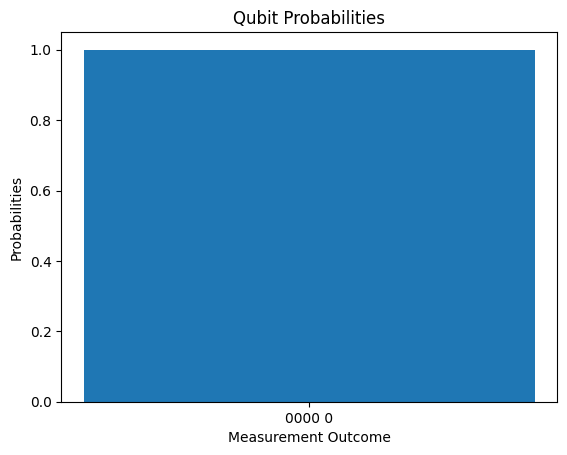

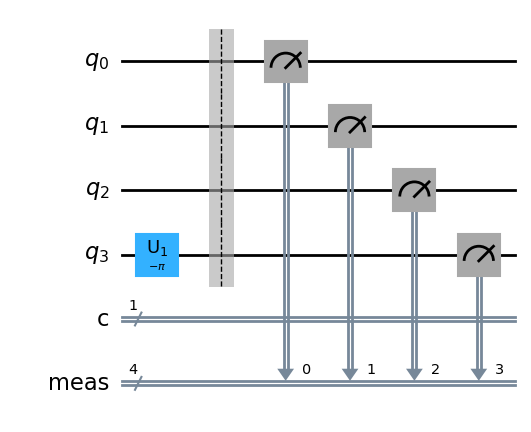

In [ ]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from sources.QuantumPlot import qplot

# Create Circuit
qc = QuantumCircuit(4, 1) # 4 qubits and 1 classical bit
qc.h(0)  # Hadamard gate on qubit 0
qc.h(1)  # Hadamard gate on qubit 1
qc.h(2)  # Hadamard gate on qubit 2
qc.h(3)  # Hadamard gate on qubit 3

# Oracle
qc.x(0) # X gate on qubit 0
qc.x(1) # X gate on qubit 1
qc.x(2) # X gate on qubit 2

qc.h(0)  # Hadamard gate on qubit 0
qc.h(1)  # Hadamard gate on qubit 1
qc.h(2)  # Hadamard gate on qubit 2
qc.h(3)  # Hadamard gate on qubit 3

qc.measure_all()  # Measeure all qubits.

# Simulate Circuit
backend = Aer.get_backend('qasm_simulator')  # Get the Aer simulator
qc = transpile(qc, backend)  # Optimize and transpile
result = backend.run(qc, shots = 500).result()  # 500 shots
counts = result.get_counts(qc)

# Plot Results
qplot(counts)
qc.draw(output='mpl')

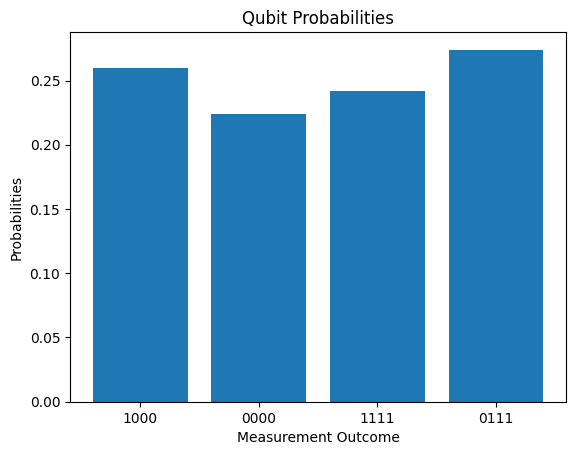

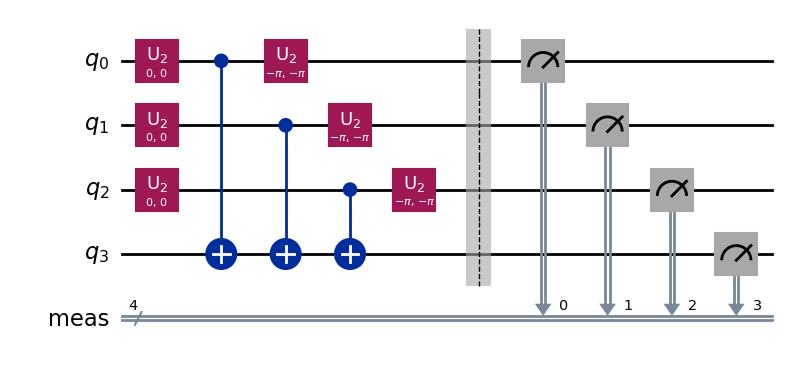

In [ ]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from sources.QuantumPlot import qplot

# Create Circuit
qc = QuantumCircuit(4) # 4 qubits
qc.h(0)  # Hadamard gate on qubit 0
qc.h(1)  # Hadamard gate on qubit 1
qc.h(2)  # Hadamard gate on qubit 2

# Oracle
qc.x(0) # not gate on qubit 0
qc.x(1) # not gate on qubit 1
qc.x(2) # not gate on qubit 2
qc.cx(0, 3) # CNOT gate from qubit 0 to qubit 3
qc.cx(1, 3) # CNOT gate from qubit 1 to qubit 3
qc.cx(2, 3) # CNOT gate from qubit 2 to qubit 3
qc.x(0) # not gate on qubit 0
qc.x(1) # not gate on qubit 1
qc.x(2) # not gate on qubit 2

qc.h(0)  # Hadamard gate on qubit 0
qc.h(1)  # Hadamard gate on qubit 1
qc.h(2)  # Hadamard gate on qubit 2

qc.measure_all()  # Measeure all qubits.

# Simulate Circuit
backend = Aer.get_backend('qasm_simulator')  # Get the Aer simulator
qc = transpile(qc, backend)  # Optimize and transpile
result = backend.run(qc, shots = 500).result()  # 500 shots
counts = result.get_counts(qc)

# Plot Results
qplot(counts)
qc.draw(output='mpl')

##### fix this!